In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [127]:
# Read in dataset
house_data = pd.read_csv("california_housing.csv")

In [128]:
# Identify Shape
house_data.shape

(20634, 9)

In [129]:
# Identify Size
house_data.size

185706

In [130]:
# Get info on datatypes
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20634 non-null  float64
 1   HouseAge            20634 non-null  float64
 2   AveRooms            20634 non-null  float64
 3   AveBedrms           20634 non-null  float64
 4   Population          20634 non-null  float64
 5   AveOccup            20634 non-null  float64
 6   Latitude            20634 non-null  float64
 7   Longitude           20634 non-null  float64
 8   price_above_median  20634 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB


In [131]:
# Check if any duplicate rows exist in the data 
house_data.duplicated().sum()

0

In [132]:
house_data.isnull().sum()

MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
price_above_median    0
dtype: int64

In [133]:
# Mean Values of all Variables
house_data.mean()

MedInc                   3.870795
HouseAge                28.640399
AveRooms                 5.429171
AveBedrms                1.096628
Population            1425.398081
AveOccup                 3.070449
Latitude                35.631722
Longitude             -119.569594
price_above_median       0.500000
dtype: float64

In [134]:
# Mode of all Variables
house_data.mode()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
0,3.1250,52.0,5.0,1.0,891.0,3.0,34.06,-118.31,0
1,15.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [135]:
# Median of all Variables
house_data.median()

MedInc                   3.534950
HouseAge                29.000000
AveRooms                 5.229190
AveBedrms                1.048780
Population            1166.000000
AveOccup                 2.817937
Latitude                34.260000
Longitude             -118.490000
price_above_median       0.500000
dtype: float64

Text(0.5, 0, 'Median Income (in tens of thousands of USD)')

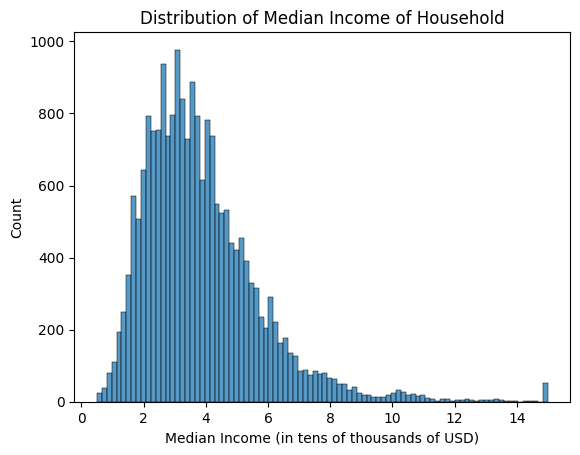

In [136]:
# Histogram Showing frequencies of 'MedInc'
sns.histplot(data=house_data['MedInc'])
plt.title('Distribution of Median Income of Household')
plt.xlabel('Median Income (in tens of thousands of USD)')

<Axes: xlabel='HouseAge'>

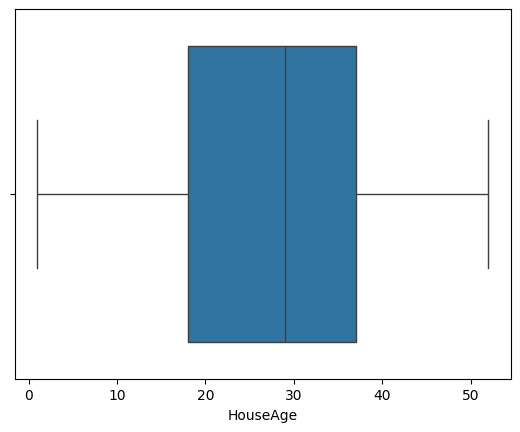

In [137]:
# Box Plot Showing Distribution of 'HouseAge'
sns.boxplot(data=house_data, x='HouseAge')

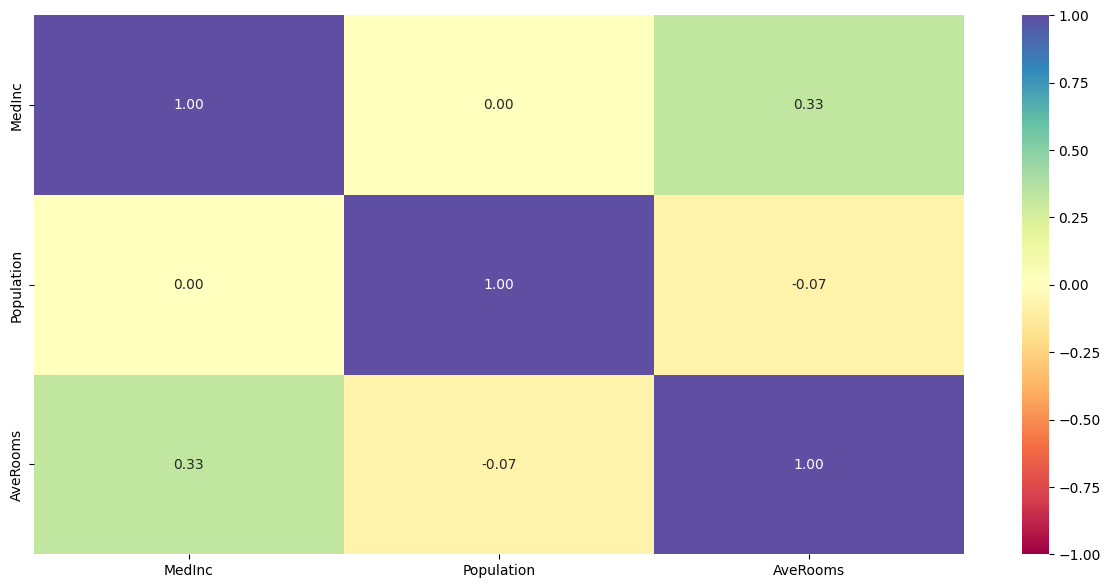

In [138]:
# Heat Map to show Correlation between Columns
corr_cols=['MedInc','Population','AveRooms']
plt.figure(figsize=(15, 7))
sns.heatmap(
   house_data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [139]:
house_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
0,2.1827,26.0,4.521429,0.921429,305.0,2.178571,40.05,-122.10,0
1,3.0755,32.0,4.623068,0.983353,3868.0,4.599287,32.77,-117.06,0
2,1.8235,40.0,4.701149,1.126437,928.0,3.555556,37.75,-122.16,0
3,1.4625,37.0,4.247845,1.105603,1673.0,3.605603,33.99,-118.28,0
4,1.9063,13.0,3.453125,0.984375,286.0,4.468750,33.97,-118.16,0


In [140]:
# Assigning subset of data as X and y 
X = house_data.drop('price_above_median', axis=1)
y = house_data["price_above_median"]

In [141]:
# Splitting the data to a 70:30 Ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)
X_train_standard_df = pd.DataFrame(X_train_standard, columns=X_train.columns)
X_test_standard_df = pd.DataFrame(X_test_standard, columns=X_test.columns)


In [142]:
# K-nearest neighbor Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {
    "n_neighbors": np.arange(1, 40, 2), 
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_standard, y_train)

best_knn = grid_search.best_estimator_

y_train_pred = best_knn.predict(X_train_standard)
y_test_pred = best_knn.predict(X_test_standard)

print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print(f"Performance on TRAIN\n********************\n{classification_report(y_train,y_train_pred)}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'}
Test Accuracy: 0.859311904377322
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      3095
           1       0.85      0.87      0.86      3096

    accuracy                           0.86      6191
   macro avg       0.86      0.86      0.86      6191
weighted avg       0.86      0.86      0.86      6191

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7222
           1       1.00      1.00      1.00      7221

    accuracy                           1.00     14443
   macro avg       1.00      1.00      1.00     14443
weighted avg       1.00      1.00      1.00     14443



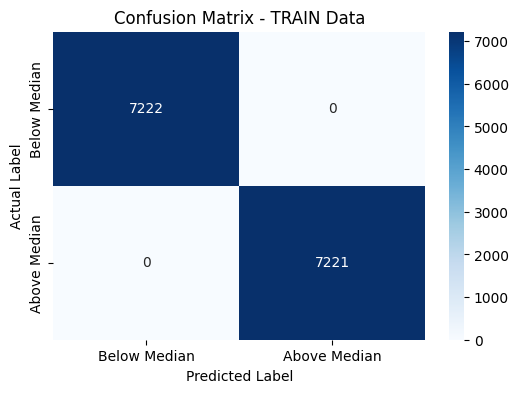

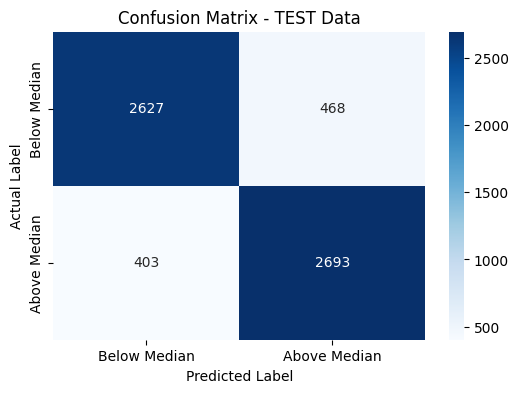

In [145]:
# Confusion Matrix for K-nearest neighbor Model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions using the best model
y_train_pred = best_knn.predict(X_train_standard)
y_test_pred = best_knn.predict(X_test_standard)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
                xticklabels=['Below Median', 'Above Median'], 
                yticklabels=['Below Median', 'Above Median'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title(title)
    plt.show()

# Plot Train Confusion Matrix
plot_confusion_matrix(cm_train, "Confusion Matrix - TRAIN Data")

# Plot Test Confusion Matrix
plot_confusion_matrix(cm_test, "Confusion Matrix - TEST Data")




In [147]:
# Decision Tree Classifier
DecisionTree = DecisionTreeClassifier(random_state=1).fit(X_train_standard_df, y_train)

# Print Report
print("Performance on TEST\n*******************\n")
print(classification_report(y_test, DecisionTree.predict(X_test_standard_df)))

print("Performance on TRAIN\n*******************\n")
print(classification_report(y_train, DecisionTree.predict(X_train_standard_df)))


Performance on TEST
*******************

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3095
           1       0.83      0.84      0.83      3096

    accuracy                           0.83      6191
   macro avg       0.83      0.83      0.83      6191
weighted avg       0.83      0.83      0.83      6191

Performance on TRAIN
*******************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7222
           1       1.00      1.00      1.00      7221

    accuracy                           1.00     14443
   macro avg       1.00      1.00      1.00     14443
weighted avg       1.00      1.00      1.00     14443



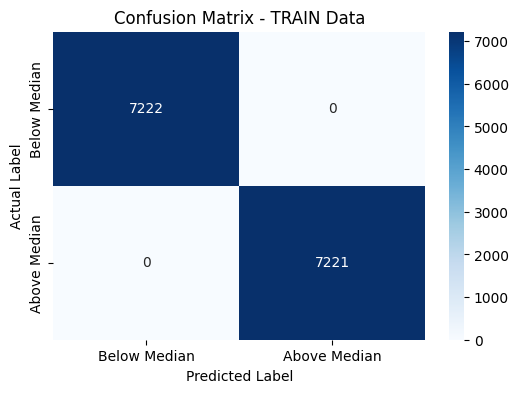

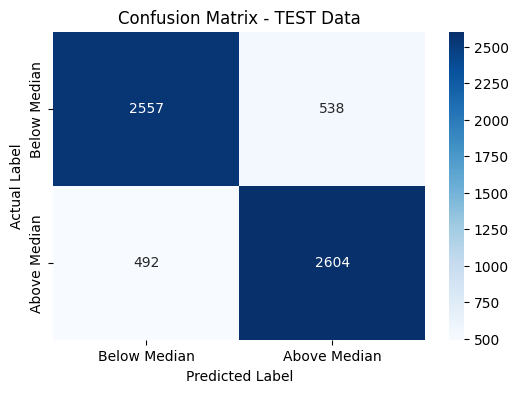

In [148]:
# Confusion Matrix for Decision Tree Classifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions using the trained Decision Tree model
y_train_pred = DecisionTree.predict(X_train_standard_df)
y_test_pred = DecisionTree.predict(X_test_standard_df)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
                xticklabels=['Below Median', 'Above Median'], 
                yticklabels=['Below Median', 'Above Median'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title(title)
    plt.show()

# Plot Train Confusion Matrix
plot_confusion_matrix(cm_train, "Confusion Matrix - TRAIN Data")

# Plot Test Confusion Matrix
plot_confusion_matrix(cm_test, "Confusion Matrix - TEST Data")



In [151]:
# Random Forrest Classifier
model = RandomForestClassifier()
# param_grid = {
#    "n_estimators": np.arange(10, 100, 2),
#    "max_depth": np.arange(start=2, stop=10),
#    "min_samples_leaf": np.arange(1, 10, 2),
#    "class_weight": [{0: 0.5, 1:0.5}],
# }

param_grid = {
    "n_estimators": [10, 50, 100],  # Reduce from 45 → 3 values
    "max_depth": [3, 5, 10],  # Reduce from 8 → 3 values
    "min_samples_leaf": [1, 5, 10],  # Reduce from 5 → 3 values
    "class_weight": ["balanced", {0: 0.3, 1: 0.7}],  # Reduce from 3 → 2 values
}
gscv = GridSearchCV(model, param_grid, cv=5, scoring="recall", )
gscv.fit(X_train, y_train)
gscv.best_params_

{'class_weight': {0: 0.3, 1: 0.7},
 'max_depth': 3,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [ ]:
rf = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': np.arange(1, 100, 2),
    'max_depth': [None] + list(np.arange(2, 10, 2)),  
    'min_samples_split': np.arange(2, 8, 2),  
    'min_samples_leaf': np.arange(1, 5, 1)
}

grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train_standard_df, y_train)

best_rf = grid_search.best_estimator_

y_train_pred = best_rf.predict(X_train_standard_df)
y_test_pred = best_rf.predict(X_test_standard_df)

print("Best Hyperparameters:", grid_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print(f"Performance on TEST\n*******************\n{classification_report(y_test, y_test_pred)}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train,y_train_pred)}")

In [74]:
# Print Report for Random Forrest Classifier
print("Performance on TEST\n*******************\n")
print(classification_report(y_test, gscv.predict(X_test), zero_division=1.0))
print("Performance on TRAIN\n********************\n")
print(classification_report(y_train, gscv.predict(X_train), zero_division=1.0))

Performance on TEST
*******************

              precision    recall  f1-score   support

           0       0.94      0.41      0.58      3135
           1       0.62      0.97      0.76      3056

    accuracy                           0.69      6191
   macro avg       0.78      0.69      0.67      6191
weighted avg       0.78      0.69      0.66      6191

Performance on TRAIN
********************

              precision    recall  f1-score   support

           0       0.94      0.40      0.56      7182
           1       0.62      0.98      0.76      7261

    accuracy                           0.69     14443
   macro avg       0.78      0.69      0.66     14443
weighted avg       0.78      0.69      0.66     14443



Confusion Matrix:
 [[1298 1837]
 [  80 2976]]


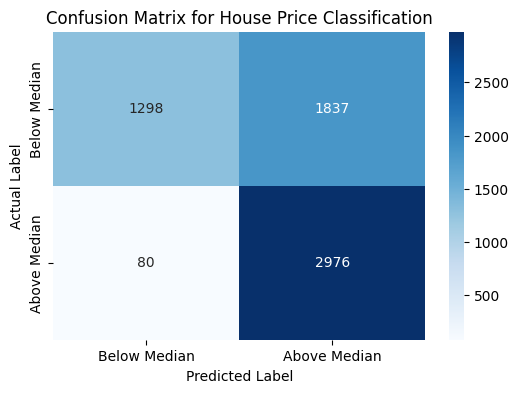

In [75]:
# Confusion Matrix for Random Forrest Classifier
# Make predictions
y_pred = gscv.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix with updated labels
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
            xticklabels=['Below Median', 'Above Median'], 
            yticklabels=['Below Median', 'Above Median'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for House Price Classification')
plt.show()

In [159]:
# AdaBoost Classifier
decision_tree_stump = DecisionTreeClassifier(max_depth=1)

param_grid = {
   'learning_rate': [0.1, 0.5, 1.0],
   'n_estimators': [50, 100, 200]
}

abc = AdaBoostClassifier(estimator=decision_tree_stump, random_state=42)
grid_search = GridSearchCV(abc, param_grid, cv=3, n_jobs=8)
grid_search.fit(X_train_standard_df, y_train)
best_abc = grid_search.best_estimator_


In [160]:
# Print Report for AdaBoost Classifier 

print("Performance on TEST\n*******************\n")
print(classification_report(y_test, best_abc.predict(X_test_standard_df), zero_division=1.0))
print("Performance on TRAIN\n********************\n")
print(classification_report(y_train, best_abc.predict(X_train_standard_df), zero_division=1.0))

Performance on TEST
*******************

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3095
           1       0.87      0.88      0.88      3096

    accuracy                           0.88      6191
   macro avg       0.88      0.88      0.88      6191
weighted avg       0.88      0.88      0.88      6191

Performance on TRAIN
********************

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7222
           1       0.89      0.89      0.89      7221

    accuracy                           0.89     14443
   macro avg       0.89      0.89      0.89     14443
weighted avg       0.89      0.89      0.89     14443



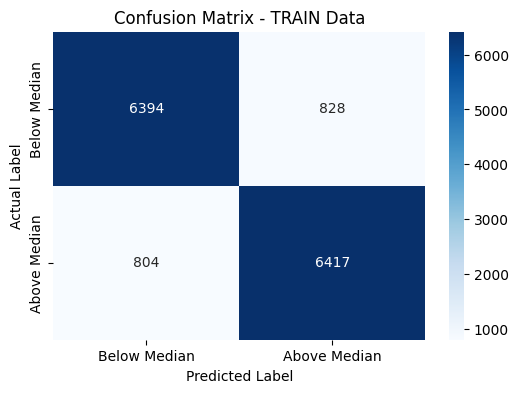

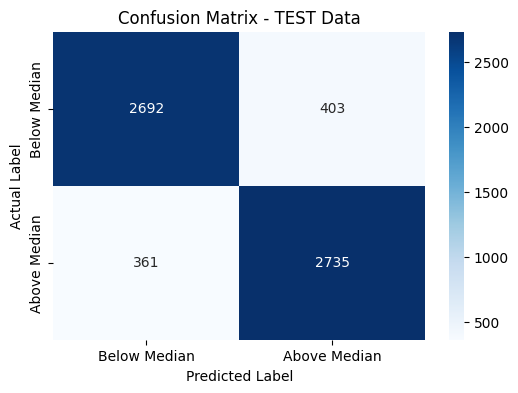

In [162]:
# Confusion Matrix for AdaBoost Classifier
# Make predictions using the best model
y_train_pred = best_abc.predict(X_train_standard_df)
y_test_pred = best_abc.predict(X_test_standard_df)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
                xticklabels=['Below Median', 'Above Median'], 
                yticklabels=['Below Median', 'Above Median'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title(title)
    plt.show()

# Plot Train Confusion Matrix
plot_confusion_matrix(cm_train, "Confusion Matrix - TRAIN Data")

# Plot Test Confusion Matrix
plot_confusion_matrix(cm_test, "Confusion Matrix - TEST Data")